In [12]:
import os

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from scipy.special import sph_harm 

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
def Y_lm_map(l, m, nside):
    npix = hp.nside2npix(nside)
    pix_coords = np.asarray(hp.pixelfunc.pix2ang(nside, np.arange(npix))).transpose()
    map_ary = np.zeros(npix, dtype=np.complex)
    for i in np.arange(npix):
        map_ary[i] += sph_harm(m, l, pix_coords[i,1], pix_coords[i,0])
    return map_ary

In [15]:
nside = 128
l = 2 
m = 1

Ylm = Y_lm_map(l, m, nside)

In [4]:
# # Download Fermi data
# os.system("wget https://dspace.mit.edu/bitstream/handle/1721.1/105492/fermi_data.tar.gz?sequence=5");
# os.system("tar -xvf fermi_data.tar.gz?sequence=5");
# os.system("rm -r fermi_data.tar.gz*");

In [5]:
dif = np.load("fermi_data/template_dif.npy")

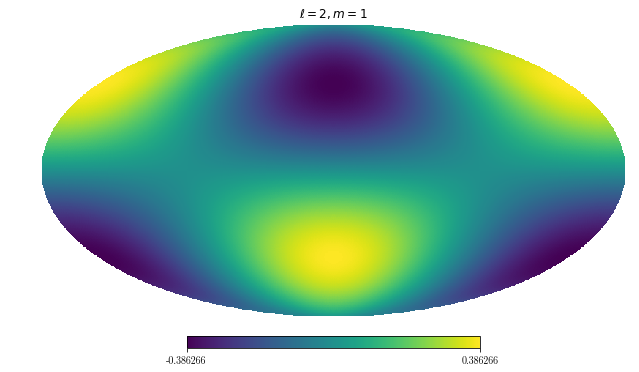

In [8]:
hp.mollview(Ylm, title="$\ell = {}, m = {}$".format(l, m))

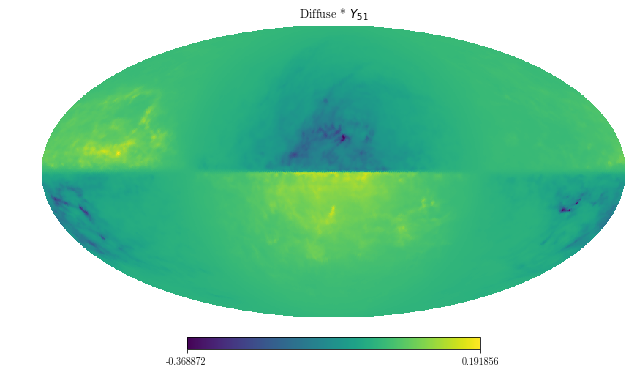

In [11]:
hp.mollview(dif * Ylm, title="Diffuse * $Y_{51}$")